<b> Mini project 2 </b>


<b> Unsupervised Stool Sample Analysis in Hepatic Encephalopathy </b>


<b> Badrinarayanan Rajasekaran (br17) , </b>
 <b> Aniruddha Sharma (ashar29)  ,</b>
 <b> Anunay Sharma (anunays2) </b>

In [0]:
#Import all packages necessary
##The commented codes in the notebook are just for the future reference if needed and not to be graded in checkpoint 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <b> Task 1:  Data Cleaning and Visual Inspection
 
0.Getting Started With the Data </b>

 <b> 1.) </b> 

We encourage the process of taking multiple sample sizes so that we can say with more confidence that these results confirm to the total population (Like mean and variance of the population). Drawing multiple sample sizes give more reliable results about the abundance of microbes with greater precision and confidence.

This is the stastical reason why biologists need multiple samples to identify microbes with significantly altered abundance 

In [0]:
from google.colab import files
upload =files.upload()
upload =files.upload()
upload =files.upload()
upload =files.upload()
upload =files.upload()

Saving QualityControl.csv to QualityControl.csv


Saving BayesInferenceHE0.csv to BayesInferenceHE0.csv


Saving BayesInferenceHE1.csv to BayesInferenceHE1.csv


Saving RelativeAbundance_HE0.csv to RelativeAbundance_HE0.csv


Saving RelativeAbundance_HE1.csv to RelativeAbundance_HE1.csv


<b> 2.) </b>

In [0]:
df_HE0=pd.read_csv('RelativeAbundance_HE0.csv')
##We have two columns for index and microbes so the total number of samples will be two less than the total columns in df
print(f'The total number of samples in RelativeAbundance_csv are {len(df_HE0.columns)-1}')

The total number of samples in RelativeAbundance_csv are 764


<b> 3.) </b>

In [0]:
print(f'The total number of microbes in RelativeAbundance_csv are {len(df_HE0)}')

The total number of microbes in RelativeAbundance_csv are 149


# <b> 1. Bayesian Network for Quality Control </b>

In [0]:
Quality_control=pd.read_csv('QualityControl.csv')

<b> a.) </b>

Let , 

S = Storage (cold or cool )

C = Contamination (Low or high)

CM= Collection Method (nurse or patient)

L = Lab time before processing (short or long) 

Q = Quality (Good or Bad)

 According to local semantics factorization of the joint probability distribution is given by conditioning the variables on the non-descendents and then ultimately simplifying that to condition only on there parents 

= <b> P(Q|L,C) x P(L) x P(C|CM,S) x P(S) X P(CM) </b>




<b> b.) </b>

The number of parameters for each of the term in the factorized joint probabiltiy distribution is given as :

P(S) =1  , P(L) =1 , P(CM) =1 , P(C|CM,S) = 4 , P(Q|L,C) = 4

The total number of parameters will just be the sum of all the individual parameters 

<b> = 1+1+1+4+4 = 11 </b>



<b> c.) </b>

The conditional probability table for each case is as follows : 

**P(Quality|Contamination, Lab Time)**


In [0]:
#P(Quality|Contamination, Lab Time)
Prob1=Quality_control.groupby(['cont','labtime','qual']).size().reset_index()
Prob1=Prob1.sort_values("qual")
Prob1=Prob1.rename(columns={0:"count"})
Prob1['prob']= round((Prob1['count']/Prob1.groupby(['cont','labtime'])['count'].transform(sum)),2)
Prob1

,cont,labtime,qual,count,prob
0,high,long,bad,57,0.97
2,high,short,bad,16,0.06
4,low,long,bad,78,0.08
6,low,short,bad,160,0.04
1,high,long,good,2,0.03
3,high,short,good,233,0.94
5,low,long,good,885,0.92
7,low,short,good,3569,0.96


**P(Contamination|Storage Temp, Collection Method)**

In [0]:
#P(Contamination|Storage Temp, Collection Method)
Prob2=Quality_control.groupby(['strtmp','coll','cont']).size().reset_index()
Prob2=Prob2.sort_values("cont")
Prob2=Prob2.rename(columns={0:"count"})
Prob2['prob']= round((Prob2['count']/Prob2.groupby(['strtmp','coll'])['count'].transform(sum)),2)
Prob2

,strtmp,coll,cont,count,prob
0,cold,nurse,high,178,0.04
2,cold,patient,high,34,0.08
4,cool,nurse,high,39,0.09
6,cool,patient,high,57,0.84
1,cold,nurse,low,3869,0.96
3,cold,patient,low,410,0.92
5,cool,nurse,low,402,0.91
7,cool,patient,low,11,0.16


**P(Storage Temp)**

In [0]:
#storage temperature
Prob3=Quality_control.groupby(['strtmp']).size().reset_index()
Prob3=Prob3.rename(columns={0:"count"})
Prob3['Prob']=round(Prob3['count']/sum(Prob3['count']),3)
Prob3

,strtmp,count,Prob
0,cold,4491,0.898
1,cool,509,0.102


**P(Collection Method)**

In [0]:
# conditional_probab_4= Quality_control.groupby(['coll']).size().reset_index()
# conditional_probab_4['probabilities']=conditional_probab_4[0].apply(lambda x: x/conditional_probab_4[0].sum())
# conditional_probab_4
Prob4=Quality_control.groupby(['coll']).size().reset_index()
Prob4=Prob4.rename(columns={0:"count"})
Prob4['Prob']=round(Prob4['count']/sum(Prob4['count']),3)
Prob4

,coll,count,Prob
0,nurse,4488,0.898
1,patient,512,0.102


**P(Lab Time)**

In [0]:
# conditional_probab_5= Quality_control.groupby(['labtime']).size().reset_index()
# conditional_probab_5['probabilities']=conditional_probab_5[0].apply(lambda x: x/conditional_probab_5[0].sum())
# conditional_probab_5
Prob5=Quality_control.groupby(['labtime']).size().reset_index()
Prob5=Prob5.rename(columns={0:"count"})
Prob5['Prob']=round(Prob5['count']/sum(Prob5['count']),3)
Prob5

,labtime,count,Prob
0,long,1022,0.204
1,short,3978,0.796


<b> d.) </b>

<b> P(Quality|Storage Temp, Collection Method, Lab Time) </b>

In [0]:
Prob21=Quality_control.groupby(['strtmp','coll','labtime','qual']).size().reset_index()
Prob21=Prob21.sort_values("qual")
Prob21=Prob21.rename(columns={0:"count"})
Prob21['prob']= round((Prob21['count']/Prob21.groupby(['strtmp','coll','labtime'])['count'].transform(sum)),2)
Prob21 = Prob21.pivot_table('prob', ['strtmp','coll','labtime'], 'qual').reset_index()

Prob21

qual,strtmp,coll,labtime,bad,good
0,cold,nurse,long,0.11,0.89
1,cold,nurse,short,0.04,0.96
2,cold,patient,long,0.14,0.86
3,cold,patient,short,0.06,0.94
4,cool,nurse,long,0.18,0.82
5,cool,nurse,short,0.03,0.97
6,cool,patient,long,0.88,0.12
7,cool,patient,short,0.04,0.96


<b>e.</b>
**Quality check for data**

In [0]:
bh0=pd.read_csv('BayesInferenceHE0.csv')
bh1=pd.read_csv('BayesInferenceHE1.csv')
bh_new0=bh0.merge(Prob21,left_on=["strtmp","coll","labtime"],right_on=["strtmp","coll","labtime"])
bh_new0['goodqual']=np.where(bh_new0['good']>0.5,1,0)
bh_new0_bad=bh_new0[bh_new0['goodqual']==0]
bh_new0_bad #Bad samples reported

,SampleName,strtmp,coll,labtime,bad,good,goodqual
699,HE0Sample_699,cool,patient,long,0.88,0.12,0
700,HE0Sample_700,cool,patient,long,0.88,0.12,0
701,HE0Sample_701,cool,patient,long,0.88,0.12,0
702,HE0Sample_702,cool,patient,long,0.88,0.12,0
703,HE0Sample_703,cool,patient,long,0.88,0.12,0
...,...,...,...,...,...,...,...
759,HE0Sample_759,cool,patient,long,0.88,0.12,0
760,HE0Sample_760,cool,patient,long,0.88,0.12,0
761,HE0Sample_761,cool,patient,long,0.88,0.12,0
762,HE0Sample_762,cool,patient,long,0.88,0.12,0


In [0]:
bh_new0=bh_new0[bh_new0['goodqual']==1][["SampleName","strtmp","coll","labtime"]]
bh_new0.shape  ##Use bh_new0 for further tasks

(699, 4)

In [0]:
bh_new1=bh1.merge(Prob21,left_on=["strtmp","coll","labtime"],right_on=["strtmp","coll","labtime"])
bh_new1['goodqual']=np.where(bh_new1['good']>0.5,1,0)
bh_new1_bad=bh_new1[bh_new1['goodqual']==0]
bh_new1_bad #Bad samples reported

,SampleName,strtmp,coll,labtime,bad,good,goodqual
699,HE1Sample_699,cool,patient,long,0.88,0.12,0
700,HE1Sample_700,cool,patient,long,0.88,0.12,0
701,HE1Sample_701,cool,patient,long,0.88,0.12,0
702,HE1Sample_702,cool,patient,long,0.88,0.12,0
703,HE1Sample_703,cool,patient,long,0.88,0.12,0
...,...,...,...,...,...,...,...
759,HE1Sample_759,cool,patient,long,0.88,0.12,0
760,HE1Sample_760,cool,patient,long,0.88,0.12,0
761,HE1Sample_761,cool,patient,long,0.88,0.12,0
762,HE1Sample_762,cool,patient,long,0.88,0.12,0


In [0]:
bh_new1=bh_new1[bh_new1['goodqual']==1][["SampleName","strtmp","coll","labtime"]]
bh_new1.shape  ##Use bh_new1 for further tasks

(699, 4)

#<b>2. Data standardization</b>

In [0]:
df_HE0=pd.read_csv('RelativeAbundance_HE1.csv')
df_HE1=pd.read_csv('RelativeAbundance_HE0.csv')

In [0]:
l=(list(df_HE0.columns))
l.remove(l[0])
x=[]
for i in l:
  if abs(float(df_HE0[i].sum())-float(1))<=(10^-10):
    x.append(i)
print("The total #columns which are outside the range criteria is {}".format(len(x)))

The total #columns which are outside the range criteria is 0


In [0]:
l=(list(df_HE1.columns))
l.remove(l[0])
x=[]
for i in l:
  if abs(float(df_HE1[i].sum())-float(1))<=(10^-10):
    x.append(i)
print("The total #columns which are outside the range criteria is {}".format(len(x)))

The total #columns which are outside the range criteria is 0


**Q2.**

The benefits of using relative abundance data would be to understand which microbe is present in highest proportion in the stool. Since we collected 764 samples, we can be quite confident about it. The drawback of using this data would be that we wouldn't be aware of the magnitude of the amount of microbes present as that can vary across samples

**Q3**

#**Visual Inspection**

<b> Relative Abundance 0 <b>

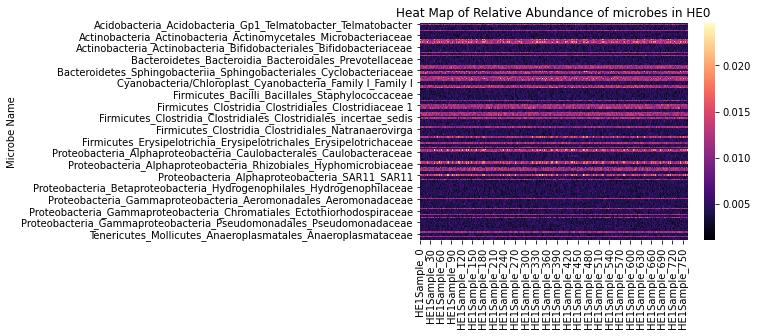

In [0]:
sns.heatmap(df_HE0.set_index("Microbe Name"),cmap='magma')
plt.savefig('Relative_Abundance_HE0.png', bbox_inches='tight')
plt.title('Heat Map of Relative Abundance of microbes in HE0')
plt.savefig('Relative_Abundance_HE0_1.png', bbox_inches='tight')

<b> Relative Abundance 1 </b>

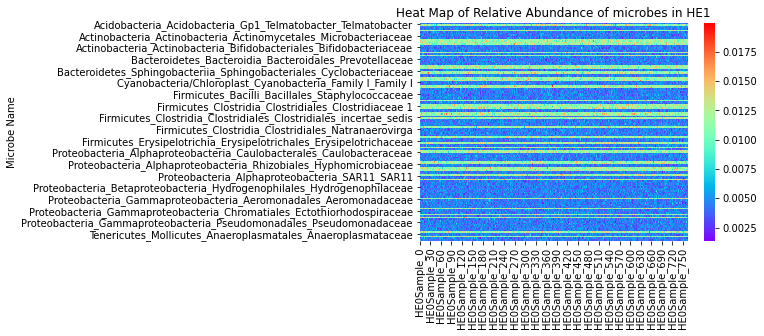

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_HE1.set_index("Microbe Name"),cmap='rainbow')
plt.title('Heat Map of Relative Abundance of microbes in HE1')
plt.savefig('Relative_Abundance_HE1_1.png', bbox_inches='tight')

The concentration of microbes across different samples seems to be more or less consistent. 
The relative abundance of some samples like Hyphomicrobeaceae (in Fig 1.) shows slight variation (pink and yellow) across different samples and their abundance is higher. While the samples like tenericutes(Last line) (in Fig 2.) have very low abundance variation throughout all the samples. 

Heatmaps are less suitable for data which shows no variation across different categories because they leverage the idea of color coding to show distinct elements. Consider the revenue of a supermarket giant which has a fixed number of customers visiting everyday. Displaying this in a heatmap serves no purpose as it doesn't highlight any change without any variation

#<b>Task 2: Statistical Analysis</b>


<b>a) Kolmogorov–Smirnov (KS) Test</b>

In [0]:
from scipy import stats
ks_test_values={}
for num in range(len(df_HE0)):
  ks_test_values[num]=stats.ks_2samp(df_HE0.iloc[num,1:],df_HE1.iloc[num,1:])

In [0]:
l1=list(df_HE1.iloc[:,0])
Microbes={}
a=0
while a<=len(l1):
  for i,j in ks_test_values.items():
    if j[1]>0.05:
      Microbes[l1[i]]=[]
      Microbes[l1[i]].append(' Microbe’s abundance is not altered')
      Microbes[l1[i]].append(j[1])
      ' Microbe’s abundance is altered'
    elif j[1]<0.05:
      Microbes[l1[i]]=[]
      Microbes[l1[i]].append('Microbe’s abundance is altered')
      Microbes[l1[i]].append(j[1])
      a+=1

***Initially considering siginificance level =0.05***

In [0]:
Microbes_difference=pd.DataFrame.from_dict(Microbes, orient='index')
Microbes_difference.rename(columns={0:'Microbes abundance',1:'p-value'},inplace=True)
Microbes_difference

,Microbes abundance,p-value
Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,Microbe’s abundance is not altered,0.177747
Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,Microbe’s abundance is altered,0.002248
Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,Microbe’s abundance is not altered,0.086320
Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,Microbe’s abundance is not altered,0.909664
Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,Microbe’s abundance is not altered,0.726977
...,...,...
Tenericutes_Mollicutes_Anaeroplasmatales_Anaeroplasmataceae,Microbe’s abundance is not altered,0.399356
Tenericutes_Mollicutes_Haloplasmatales_Haloplasmataceae,Microbe’s abundance is not altered,0.221336
Tenericutes_Mollicutes_Mycoplasmatales_Mycoplasmataceae,Microbe’s abundance is altered,0.013030
Thermodesulfobacteria_Thermodesulfobacteria_Thermodesulfobacteriales_Thermodesulfobacteriaceae,Microbe’s abundance is not altered,0.684300


**B)** 
<b>
Null Hypothesis: The given microbe is unaltered in both the population (HE0 and HE1)
(Both the samples of microbes come from the same distribution)

Alternate Hypothesis: The given microbe is altered in both the population
(The samples of microbes doesn't come from the same distribution)

For example if we consider the microbe -Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter it has a p-value of 0.18 (approx) which is greater than the significane level so we fail to reject the null hypothesis.

Conclusion : Microbes abundance is not altered across the samples 
</b>

**C)**

In [0]:
alpha = [0.1, 0.05, 0.01, 0.005, 0.001]
result = {}
for i in range(0,len(alpha)):
    result[alpha[i]]=0
    #result.update({i: Microbes_difference[Microbes_difference['p-value']< alpha[i]].count()})
    result[alpha[i]]+=Microbes_difference[Microbes_difference['p-value']< alpha[i]]['p-value'].count()
result1 = pd.DataFrame(list(result.items()), columns=['alpha', 'altered count'])
result1

,alpha,altered count
0,0.100,48
1,0.050,36
2,0.010,27
3,0.005,24
4,0.001,20


<b> 2. Multiple Testing </b>

<b> a.) <b> 

The p-value is the probability of obtaining results as extreme as the observed results of a hypothesis test, assuming that the null hypothesis is correct. Typically a p-value of less than or equal to .05 indicates strong evidence against the null hypothesis, thus we can reject the null hypothesis.In the given problem's context, p-value of 0.05 would mean that the  Null Hypothesis: The given microbe is unaltered in both the population (HE0 and HE1) is not true. There is a 5% chance that the microbe content will be unaltered in both the population. 
Alternatively, we can also say that the microbe content is altered in both the populations with 95% confidence.

<b> b.) </b>

When the null hypothesis is true and the underlying random variable is continuous, then the probability distribution of the p-value is uniform in the interval [0,1]

Under the null hypothesis, your test statistic T has the distribution F(t) (e.g., standard normal). We show that the p-value P=F(T) has a probability distribution
Pr(P<p)=Pr(F−1(P)<F−1(p))=Pr(T<t)≡p;
in other words, P is distributed uniformly. This holds so long as F(⋅) is invertible, a necessary condition of which is that T is not a discrete random variable.

Reference: https://stats.stackexchange.com/questions/10613/why-are-p-values-uniformly-distributed-under-the-null-hypothesis

<b> c.) </b>

In [0]:
 alpha = [0.1, 0.05, 0.01, 0.005, 0.001]
# results = {}
# for i in range(0,len(alpha)):
#     results[alpha[i]]=0
#     #result.update({i: Microbes_difference[Microbes_difference['p-value']< alpha[i]].count()})
#     results[alpha[i]]+=Microbes_difference[Microbes_difference['p-value']> alpha[i]]['p-value'].count()
# result2 = pd.DataFrame(list(results.items()), columns=['alpha', 'unaltered count'])
# result2['altered count'] = result1['altered count']
# result2
result1['expected significant p-values']=round(result1['alpha']*len(Microbes_difference),0)
result1

,alpha,altered count,expected significant p-values
0,0.100,48,15.0
1,0.050,36,7.0
2,0.010,27,1.0
3,0.005,24,1.0
4,0.001,20,0.0


In [0]:
# alpha = [0.1, 0.05, 0.01, 0.005, 0.001]
# np.random.seed(101)
# import numpy as np
# ##drawing 149 samples from a uniform distribution 
# N_expected=np.random.uniform(size=df1.shape[0])
# results = {}

# for i in alpha:
#   results[i]=0
#   for num in N_expected:
#     #result.update({i: Microbes_difference[Microbes_difference['p-value']< alpha[i]].count()})
#     if num< i:  
#       results[i]+=1
#     else:
#       continue

# results = pd.DataFrame(list(results.items()), columns=['alpha', 'Altered count'])
# results

<b> d.) </b>

<b> i.) Sampling the N p-values from the expected distribution</b>

In [0]:
np.random.seed(101)
import numpy as np
##drawing 149 samples from a uniform distribution 
N_expected=np.random.uniform(size=df_HE0.shape[0])

<b> ii.) Taking the log of both the expected and observed p-values</b>

In [0]:
## Taking log of the observed p-values
ks = pd.DataFrame(ks_test_values.values())
import math
log_observed_pvalue = []
observed_p_value=[]
for i in range(0,len(ks)):
    l = -1*math.log10(ks['pvalue'][i])
    log_observed_pvalue.append(l)
    observed_p_value.append(ks['pvalue'][i])
## Taking log of the expected p-values
log_expected_pvalue = []
expected_p_value=[]
for num in (N_expected):
    l = -1*math.log10(num)
    log_expected_pvalue.append(l)

<b> iii.) </b> arranging the list of log observed and expected p-values in ascending order

In [0]:
log_expected_pvalue.sort()
log_observed_pvalue.sort()
# max(log_expected_pvalue) #0.025 - 1.88
# max(log_observed_pvalue) #0.018 - 22.98
#min(N_expected) #0.013 - 0.99
min(observed_p_value) #10-23 - 0.99


1.1971999236901672e-23

<b> iv) </b>

Taking the pair of the smallest p-values from the observed and expected p-values

In [0]:
pair_of_smallest=(log_expected_pvalue[0],log_observed_pvalue[0])
pair_of_smallest

(0.0024747417152551987, 0.00019825070399178145)

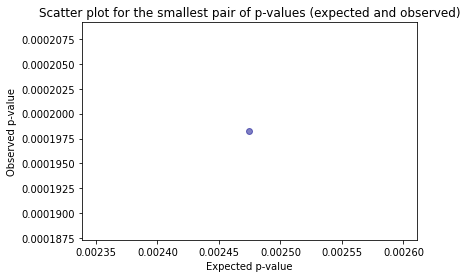

In [0]:
plt.scatter(pair_of_smallest[0],pair_of_smallest[1],marker='o',c='darkblue',alpha=0.5)
plt.title('Scatter plot for the smallest pair of p-values (expected and observed)')
plt.ylabel('Observed p-value')
plt.xlabel('Expected p-value')
plt.style.use('Solarize_Light2')

<b> v.) </b>
Plotting the next pair of points

0.0024747417152551987 0.00019825070399178145
0.0055452543060603605 0.003660351972802452


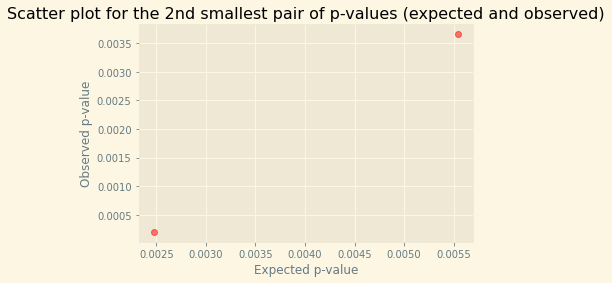

In [0]:
for num in range(2):
  plt.scatter(log_expected_pvalue[num],log_observed_pvalue[num],marker='o',c='red',alpha=0.5)
  print(log_expected_pvalue[num],log_observed_pvalue[num])
  plt.title('Scatter plot for the 2nd smallest pair of p-values (expected and observed)')
  plt.ylabel('Observed p-value')
  plt.xlabel('Expected p-value')
  plt.style.use('Solarize_Light2') 

Plotting all the pair of points like this

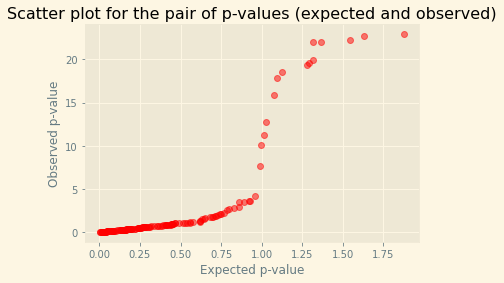

In [0]:
for i,j in zip(log_expected_pvalue,log_observed_pvalue):
  plt.scatter(i,j,marker='o',c='red',alpha=0.5)
  plt.title('Scatter plot for the pair of p-values (expected and observed)')
  plt.ylabel('Observed p-value')
  plt.xlabel('Expected p-value')
  plt.style.use('Solarize_Light2')

<b> vi) </b>
Adding the x-y line to the above plot

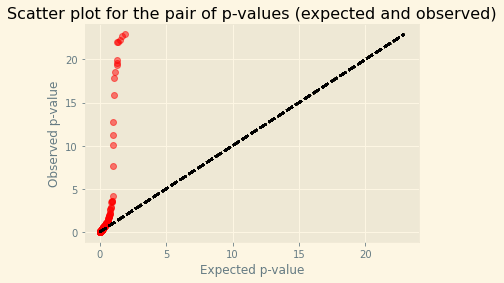

In [0]:
for i,j in zip(log_expected_pvalue,log_observed_pvalue):
  plt.scatter(i,j,marker='o',c='red',alpha=0.5)
  plt.title('Scatter plot for the pair of p-values (expected and observed)')
  plt.ylabel('Observed p-value')
  plt.xlabel('Expected p-value')
  lineStart = min(log_observed_pvalue)
  lineEnd = max(log_observed_pvalue)
  plt.plot([lineStart, lineEnd], [lineStart, lineEnd], '--', color = 'black')
  plt.style.use('Solarize_Light2')
  

<b> e.)

<b> i.)  Taking -log10() of values (See the figure of P values without taking log) </b>

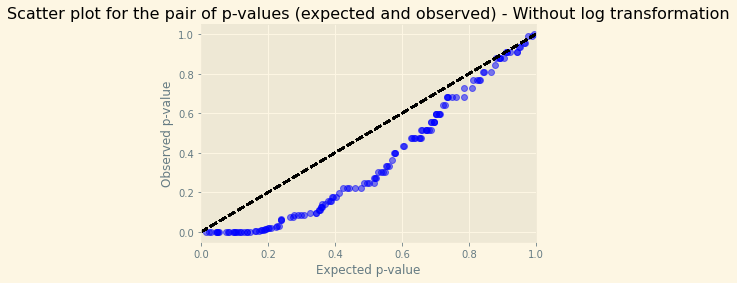

In [0]:
N_expected.sort()
observed_p_value.sort()

for i,j in zip(N_expected,observed_p_value):
  plt.scatter(i,j,marker='o',c='blue',alpha=0.5)
  plt.title('Scatter plot for the pair of p-values (expected and observed) - Without log transformation')
  plt.ylabel('Observed p-value')
  plt.xlabel('Expected p-value')
  lineStart = min(observed_p_value)
  lineEnd = max(observed_p_value)
  plt.plot([lineStart, lineEnd], [lineStart, lineEnd], '--', color = 'black')
  plt.style.use('Solarize_Light2')
  plt.xlim(0,1)

<b>i. Taking -log10() of the pvalues helps us to expand the scale of the values a bit so that it is easier to draw insights from the visual representation (in this case a Q-Q plot)<b>

Expected p value 0.013 - 0.99<br>
Observed p value 1.2*10^-23 - 0.99 <br>

Post log transformation<br>
Log Expected p value 0.025 - 1.88 </br>
Log observed p value 0.018 - 22.98
</b> 

<b>ii. The QQ plot shows that the points do not align along the x=y line. It indicates that the data sets come from different distributions. In the context of the problem, the null hypothesis does not hold true and the plot suggests that the microbe content is altered in both the populations.</b>

### <B> Task 3: Dimensionality Reduction and Clustering  </B>
<b>1. Prinicpal Component Analysis(PCA)<b>

<b>HE0 - a.) and b.)<b>

In [0]:
df_HE0_0=pd.read_csv("RelativeAbundance_HE0.csv")
df_HE1_1=pd.read_csv("RelativeAbundance_HE1.csv")

In [0]:
from sklearn.decomposition import PCA
df_HE0_0.set_index('Microbe Name',inplace=True)
df_HE0_0_transpose=df_HE0_0.transpose()
pca = PCA(svd_solver='full')
pca.fit_transform(df_HE0_0_transpose)

array([[ 3.17685367e-03,  2.60632573e-03,  2.18549783e-03, ...,
         9.96372830e-04, -1.60388473e-04,  2.09261948e-17],
       [ 5.48147505e-03, -3.92736592e-04, -2.18404040e-03, ...,
         6.31905651e-04,  6.26531926e-04,  1.79148213e-17],
       [ 4.72550683e-03,  2.45987695e-03, -8.49754985e-04, ...,
         3.70802316e-04,  5.83062376e-04,  1.62774418e-17],
       ...,
       [-3.07583026e-03,  1.16306969e-04, -1.51946121e-03, ...,
        -1.82188227e-04, -3.71451933e-04,  2.07065246e-17],
       [ 2.17021106e-03,  1.03471140e-03, -1.94850272e-03, ...,
        -7.88938330e-05,  1.32312029e-03,  1.94072826e-17],
       [ 5.66304803e-03,  2.76547115e-03,  3.02017527e-03, ...,
         6.34379975e-04,  1.55243556e-04,  1.99963675e-17]])

In [0]:
print(pca.explained_variance_ratio_*100)

[7.25232571e+00 1.84179268e+00 1.80482595e+00 1.76533530e+00
 1.69513872e+00 1.62306691e+00 1.61480160e+00 1.59741166e+00
 1.56478929e+00 1.53634513e+00 1.50599284e+00 1.45132039e+00
 1.43293886e+00 1.42116838e+00 1.41177873e+00 1.36496193e+00
 1.35528891e+00 1.34557256e+00 1.33152982e+00 1.32496000e+00
 1.28334086e+00 1.26679232e+00 1.26526267e+00 1.21924051e+00
 1.19815746e+00 1.17598454e+00 1.15590699e+00 1.12581339e+00
 1.11724236e+00 1.10420764e+00 1.08727731e+00 1.07104516e+00
 1.04745973e+00 1.02793053e+00 1.01292067e+00 9.93125826e-01
 9.78099458e-01 9.58136963e-01 9.35920694e-01 9.24714818e-01
 8.89873396e-01 8.81062335e-01 8.58548267e-01 8.14844292e-01
 7.87513424e-01 6.82259794e-01 6.59873190e-01 6.56431899e-01
 6.34830503e-01 6.31900926e-01 5.98139493e-01 5.95041956e-01
 5.80878808e-01 5.69282085e-01 5.66009093e-01 5.60837190e-01
 5.55700444e-01 5.54565075e-01 5.46083968e-01 5.39305463e-01
 5.24811371e-01 5.23342279e-01 5.14081943e-01 5.06075702e-01
 4.99836420e-01 4.941608

Text(0.5, 0.98, 'Scree plot HE0')

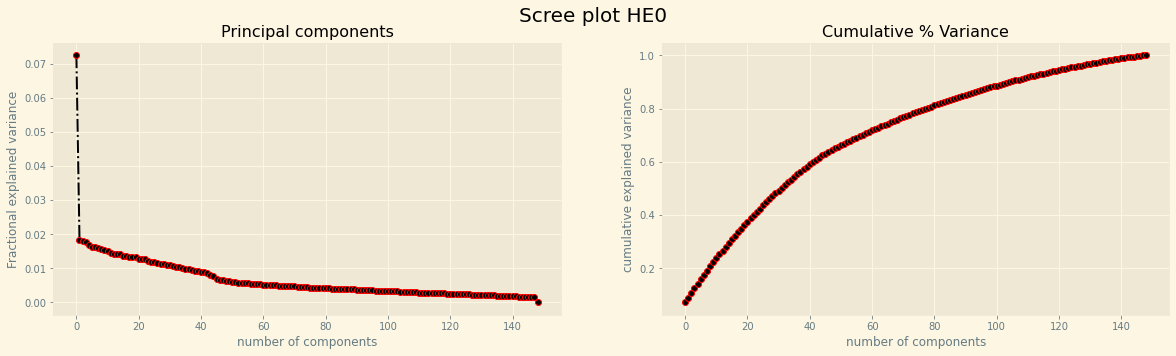

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].plot(pca.explained_variance_ratio_,marker='o',markeredgecolor='red',linestyle='-.',c='black')
axes[0].set_xlabel('number of components')
axes[0].set_ylabel('Fractional explained variance')
axes[0].set_title('Principal components')
axes[1].plot(np.cumsum(pca.explained_variance_ratio_),marker='o',markeredgecolor='red',linestyle='-.',c='black')
axes[1].set_xlabel('number of components')
axes[1].set_ylabel('cumulative explained variance')
axes[1].set_title('Cumulative % Variance')
fig.suptitle('Scree plot HE0',fontsize=20)

In [0]:

variance_explained=0
flag=list(np.cumsum(pca.explained_variance_ratio_))
for num in range(len(flag)):
  variance_explained=flag[num]
  if variance_explained>=0.3:
    break
print(f'The number of components to explain 30% of the variance are {num+1}')


The number of components to explain 30% of the variance are 16


**HE1 - a.) and b.)**

In [0]:
from sklearn.decomposition import PCA
df_HE1_1.set_index('Microbe Name',inplace=True)
df_HE1_1_transpose=df_HE1_1.transpose()
pca = PCA(svd_solver='full')
pca.fit_transform(df_HE1_1_transpose)

array([[-6.03181707e-03, -1.72345827e-03, -2.84506236e-04, ...,
         1.36016791e-03, -6.59870281e-04,  1.96053785e-18],
       [ 1.43198942e-02, -5.33004812e-04,  2.66305017e-03, ...,
        -9.03367066e-05, -1.14276215e-04,  2.17616342e-18],
       [-5.42970257e-03, -2.73522312e-03,  5.02787762e-04, ...,
        -5.30244975e-04, -2.26060235e-04,  9.34985076e-20],
       ...,
       [-4.28880835e-03,  4.46223149e-03, -3.42819438e-03, ...,
         4.92236637e-04, -8.50230651e-04,  2.47013386e-18],
       [-5.94439674e-03,  3.63576489e-03, -2.86029033e-03, ...,
        -1.75242611e-04,  4.06176217e-04,  6.08432405e-18],
       [ 1.42844550e-02, -5.69552842e-04, -4.49596603e-03, ...,
         1.67985413e-03, -2.38124018e-04,  6.10969779e-18]])

In [0]:
print(pca.explained_variance_ratio_*100)

[2.90182651e+01 4.08656084e+00 1.39365144e+00 1.31944532e+00
 1.28286317e+00 1.26529298e+00 1.23381500e+00 1.21487684e+00
 1.18283701e+00 1.12548446e+00 1.10812804e+00 1.10410657e+00
 1.06997329e+00 1.05031351e+00 1.04352240e+00 1.02049585e+00
 9.98182118e-01 9.78346346e-01 9.74790000e-01 9.58855003e-01
 9.48889421e-01 9.31402336e-01 9.05113804e-01 8.89746495e-01
 8.83169346e-01 8.71906780e-01 8.62141320e-01 8.45657173e-01
 8.34949325e-01 8.21193201e-01 8.07788762e-01 7.81715686e-01
 7.75543692e-01 7.64709941e-01 7.47721691e-01 7.25701775e-01
 7.11035774e-01 6.99044958e-01 6.87031338e-01 6.71303583e-01
 6.58861740e-01 6.43213411e-01 6.25529154e-01 6.17003842e-01
 5.74344628e-01 4.93823712e-01 4.78477307e-01 4.70366960e-01
 4.59267663e-01 4.47630976e-01 4.41791909e-01 4.34009641e-01
 4.30506105e-01 4.20211990e-01 4.14391825e-01 4.11648585e-01
 4.04766693e-01 3.98742197e-01 3.96125241e-01 3.90653048e-01
 3.86914189e-01 3.83423841e-01 3.75295826e-01 3.73749497e-01
 3.70813424e-01 3.658544

Text(0.5, 0.98, 'Scree plot HE1')

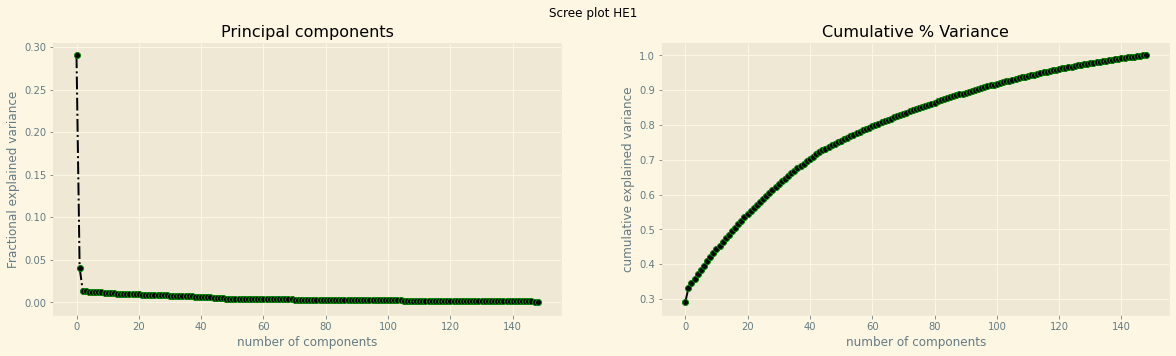

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].plot(pca.explained_variance_ratio_,marker='o',markeredgecolor='green',linestyle='-.',c='black')
axes[0].set_xlabel('number of components')
axes[0].set_ylabel('Fractional explained variance')
axes[0].set_title('Principal components')
axes[1].plot(np.cumsum(pca.explained_variance_ratio_),marker='o',markeredgecolor='green',linestyle='-.',c='black')
axes[1].set_xlabel('number of components')
axes[1].set_ylabel('cumulative explained variance')
axes[1].set_title('Cumulative % Variance')
fig.suptitle('Scree plot HE1')

In [0]:
variance_explained=0
flag=list(np.cumsum(pca.explained_variance_ratio_))
for num in range(len(flag)):
  variance_explained=flag[num]
  if variance_explained>=0.3:
    break
print(f'The number of components to explain 30% of the variance are {num+1}')

The number of components to explain 30% of the variance are 2


<b> c.) <b>

Text(0.5, 0.98, 'Scatter plot for the first two principal components for the relative abundance data')

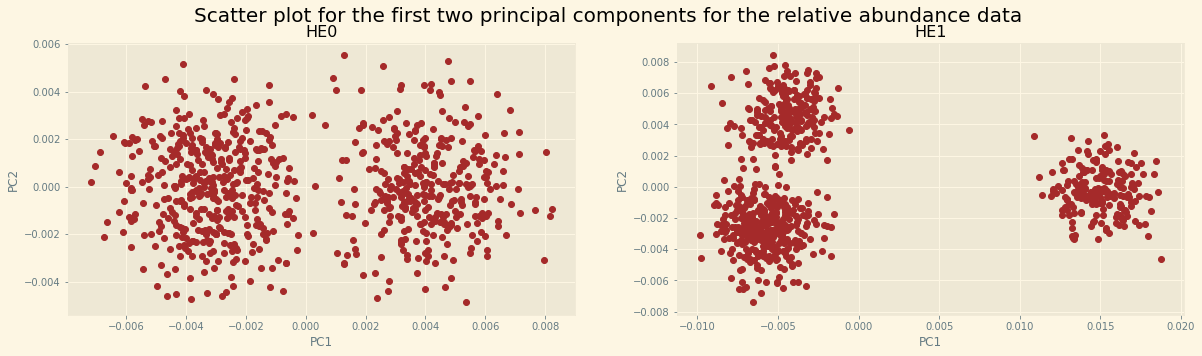

In [0]:
#For Relative Abundance HE0
pca=PCA(n_components=2)
df_HE0_0_transpose=df_HE0_0.transpose()
prin_comp_0=pca.fit_transform(df_HE0_0_transpose)
prin_comp_0=pd.DataFrame(prin_comp_0,columns = ['principal component 1', 'principal component 2'])

#For Relative Abundance HE1
pca=PCA(n_components=2)
df_HE1_1_transpose=df_HE1_1.transpose()
prin_comp_1=pca.fit_transform(df_HE1_1_transpose)
prin_comp_1=pd.DataFrame(prin_comp_1,columns = ['principal component 1', 'principal component 2'])

fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].scatter(prin_comp_0["principal component 1"],prin_comp_0["principal component 2"],color='brown')
axes[0].set_title('HE0')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[1].scatter(prin_comp_1["principal component 1"],prin_comp_1["principal component 2"],color='brown')
axes[1].set_title('HE1')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
fig.suptitle('Scatter plot for the first two principal components for the relative abundance data',fontsize=20)

1) From the plot, we could clearly see that there exists 2 distinct clusters in RH0 and 3 distinct clusters in RH1. The 2 prinicpal components have been able to capture around 9% and 33% of variance. That is why we are able to see more clear clusters in the RH1 data.

2) The intra-cluster distance between the samples in HE0 is more and the inter-cluster is less. Conversely, for HE1 samples, inter-cluster distance is more and intra-cluster distance between samples is less. 


## <b>2. t-Distributed Stochastic Neighbor Embedding (t-SNE) <b>

In [0]:
import numpy as np
from sklearn.manifold import TSNE

In [0]:
df_HE0_0_transpose.head()

Microbe Name,Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,Actinobacteria_Actinobacteria_Actinomycetales_Corynebacteriaceae,Actinobacteria_Actinobacteria_Actinomycetales_Dermabacteraceae,Actinobacteria_Actinobacteria_Actinomycetales_Geodermatophilaceae,Actinobacteria_Actinobacteria_Actinomycetales_Microbacteriaceae,Actinobacteria_Actinobacteria_Actinomycetales_Micrococcaceae,Actinobacteria_Actinobacteria_Actinomycetales_Micromonosporaceae,Actinobacteria_Actinobacteria_Actinomycetales_Nakamurellaceae,Actinobacteria_Actinobacteria_Actinomycetales_Nocardiaceae,Actinobacteria_Actinobacteria_Actinomycetales_Propionibacteriaceae,Actinobacteria_Actinobacteria_Actinomycetales_Pseudonocardiaceae,Actinobacteria_Actinobacteria_Actinomycetales_Sanguibacteraceae,Actinobacteria_Actinobacteria_Bifidobacteriales_Bifidobacteriaceae,Actinobacteria_Actinobacteria_Coriobacteriales_Coriobacteriaceae,Armatimonadetes_Chthonomonadetes_Chthonomonadales_Chthonomonadaceae,Bacteroidetes_Bacteroidia_Bacteroidales_Bacteroidaceae,Bacteroidetes_Bacteroidia_Bacteroidales_Bacteroidales_incertae_sedis,Bacteroidetes_Bacteroidia_Bacteroidales_Marinilabiaceae,Bacteroidetes_Bacteroidia_Bacteroidales_Marinilabiliaceae,Bacteroidetes_Bacteroidia_Bacteroidales_Porphyromonadaceae,Bacteroidetes_Bacteroidia_Bacteroidales_Prevotellaceae,Bacteroidetes_Bacteroidia_Bacteroidales_Prolixibacteraceae,Bacteroidetes_Bacteroidia_Bacteroidales_Rikenellaceae,Bacteroidetes_Cytophagia_Cytophagales_Cytophagaceae,Bacteroidetes_Cytophagia_Cytophagales_Flammeovirgaceae,Bacteroidetes_Flavobacteriia_Flavobacteriales_Cryomorphaceae,Bacteroidetes_Flavobacteriia_Flavobacteriales_Flavobacteriaceae,Bacteroidetes_Sphingobacteriia_Sphingobacteriales_Chitinophagaceae,Bacteroidetes_Sphingobacteriia_Sphingobacteriales_Cyclobacteriaceae,Bacteroidetes_Sphingobacteriia_Sphingobacteriales_Sphingobacteriaceae,Candidatus Saccharibacteria_Saccharibacteria_genera_incertae_sedis_Saccharibacteria_genera_incertae_sedis_Saccharibacteria_genera_incertae_sedis,Chloroflexi_Anaerolineae_Anaerolineales_Anaerolineaceae,Chloroflexi_Dehalococcoidia_Dehalococcoidales_Dehalococcoidaceae,Chloroflexi_Ktedonobacteria_Ktedonobacterales_Thermosporotrichaceae,Chrysiogenetes_Chrysiogenetes_Chrysiogenales_Chrysiogenaceae,Cyanobacteria/Chloroplast_Chloroplast_Chloroplast_Chloroplast,...,Proteobacteria_Betaproteobacteria_Burkholderiales_Comamonadaceae,Proteobacteria_Betaproteobacteria_Burkholderiales_Oxalobacteraceae,Proteobacteria_Betaproteobacteria_Burkholderiales_Sutterellaceae,Proteobacteria_Betaproteobacteria_Hydrogenophilales_Hydrogenophilaceae,Proteobacteria_Betaproteobacteria_Neisseriales_Neisseriaceae,Proteobacteria_Betaproteobacteria_Rhodocyclales_Rhodocyclaceae,Proteobacteria_Deltaproteobacteria_Desulfobacterales_Desulfobacteraceae,Proteobacteria_Deltaproteobacteria_Desulfovibrionales_Desulfovibrionaceae,Proteobacteria_Deltaproteobacteria_Myxococcales_Cystobacteraceae,Proteobacteria_Epsilonproteobacteria_Campylobacterales_Campylobacteraceae,Proteobacteria_Epsilonproteobacteria_Nautiliales_Nautiliaceae,Proteobacteria_Gammaproteobacteria_Aeromonadales_Aeromonadaceae,Proteobacteria_Gammaproteobacteria_Aeromonadales_Succinivibrionaceae,Proteobacteria_Gammaproteobacteria_Alteromonadales_Celerinatantimonadaceae,Proteobacteria_Gammaproteobacteria_Alteromonadales_Ferrimonadaceae,Proteobacteria_Gammaproteobacteria_Alteromonadales_Neiella,Proteobacteria_Gammaproteobacteria_Alteromonadales_Pseudoalteromonadaceae,Proteobacteria_Gammaproteobacteria_Candidatus Carsonella_Candidatus Carsonella,Proteobacteria_Gammaproteobacteria_Chromatiales_Chromatiaceae,Proteobacteria_Gammaproteobacteria_Chromatiales_Ectothiorhodospiraceae,Proteobacteria_Gammaproteobacteria_Enterobacteriales_Enterobacteriaceae,

In [0]:
# X_embedded_0_1 = TSNE(n_components=2,random_state=42).fit_transform(df_HE0.drop(columns=['Microbe Name']))
# X_embedded_0_2 = TSNE(n_components=2,random_state=62).fit_transform(df_HE0.drop(columns=['Microbe Name']))
# X_embedded_0_3 = TSNE(n_components=2,random_state=82).fit_transform(df_HE0.drop(columns=['Microbe Name']))

In [0]:
#For Relative abundance HE0
X_embedded_0_1 = TSNE(n_components=2,random_state=42).fit_transform(df_HE0_0_transpose)
X_embedded_0_2 = TSNE(n_components=2,random_state=62).fit_transform(df_HE0_0_transpose)
X_embedded_0_3 = TSNE(n_components=2,random_state=82).fit_transform(df_HE0_0_transpose)

In [0]:
# X_embedded_1_1 = TSNE(n_components=2,random_state=42).fit_transform(df_HE1_1_transpose.drop(columns=['Microbe Name']))
# X_embedded_1_2 = TSNE(n_components=2,random_state=62).fit_transform(df_HE1_1_transpose.drop(columns=['Microbe Name']))
# X_embedded_1_3 = TSNE(n_components=2,random_state=82).fit_transform(df_HE1_1_transpose.drop(columns=['Microbe Name']))

In [0]:
#For Relative abundance HE1
X_embedded_1_1 = TSNE(n_components=2,random_state=42).fit_transform(df_HE1_1_transpose)
X_embedded_1_2 = TSNE(n_components=2,random_state=62).fit_transform(df_HE1_1_transpose)
X_embedded_1_3 = TSNE(n_components=2,random_state=82).fit_transform(df_HE1_1_transpose)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'T-SNe plots for Relative abundance data ')

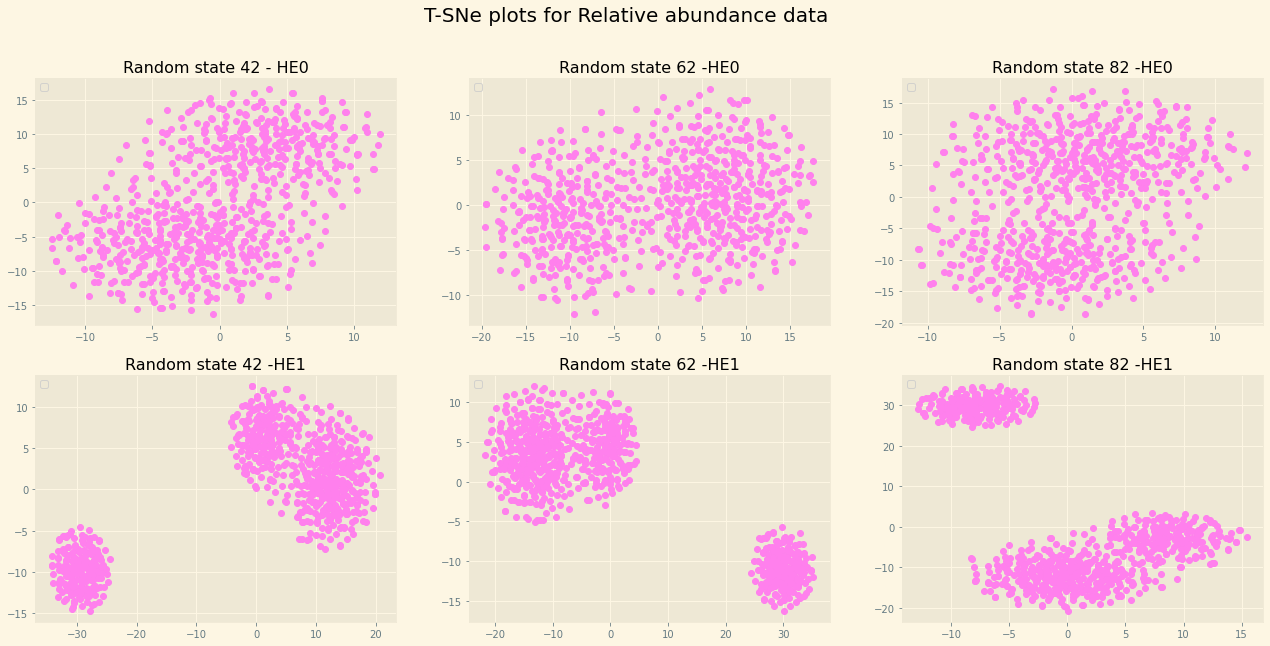

In [0]:
fig, ax = plt.subplots(2, 3, figsize=(22,10))

ax[0][0].scatter(X_embedded_0_1[:,0],X_embedded_0_1[:,1],color='#ff80ed')
ax[0][0].legend(loc='upper left')
ax[0][0].set_title('Random state 42 - HE0')

ax[0][1].scatter(X_embedded_0_2[:,0],X_embedded_0_2[:,1],color='#ff80ed')
ax[0][1].legend(loc='upper left')
ax[0][1].set_title('Random state 62 -HE0')

ax[0][2].scatter(X_embedded_0_3[:,0],X_embedded_0_3[:,1],color='#ff80ed')
ax[0][2].legend(loc='upper left')
ax[0][2].set_title('Random state 82 -HE0')


ax[1][0].scatter(X_embedded_1_1[:,0],X_embedded_1_1[:,1],color='#ff80ed')
ax[1][0].legend(loc='upper left')
ax[1][0].set_title('Random state 42 -HE1')

ax[1][1].scatter(X_embedded_1_2[:,0],X_embedded_1_2[:,1],color='#ff80ed')
ax[1][1].legend(loc='upper left')
ax[1][1].set_title('Random state 62 -HE1')

ax[1][2].scatter(X_embedded_1_3[:,0],X_embedded_1_3[:,1],color='#ff80ed')
ax[1][2].legend(loc='upper left')
ax[1][2].set_title('Random state 82 -HE1')

fig.suptitle('T-SNe plots for Relative abundance data ',fontsize=20)

## **b**.


***Similarity :***

1) Both the algorithms are used for dimensionality reduction of bigger size datasets

2) Both are unsupervised learning techniques which can be used for data exploration and visualization.

***Differences :***

1) PCA uses linear feature extraction technique to find the components with the largest variance

2)T-SNe uses non linear feature reduction from high dimensional space to low dimensional space      


<b> 3.) Clustering </b>
 

<b>a) Kmeans clustering<b>

Text(0.5, 0.98, 'Elbow curves for relative abundance datasets')

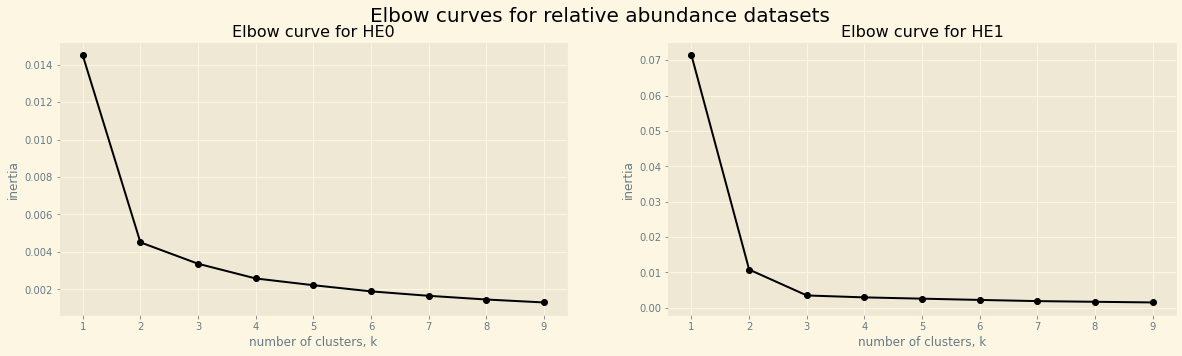

In [0]:
from sklearn.cluster import KMeans
# Empty list to store Sum of squared distances of samples to their closest cluster centre

fig, axes = plt.subplots(1, 2, figsize=(20,5))
inertias = []
for k in range(1,10):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to samples
    #model.fit(pca_1.iloc[:,:3])
    model.fit(prin_comp_0)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
axes[0].plot(range(1,10), inertias, '-o', color='black')
axes[0].set_xlabel('number of clusters, k')
axes[0].set_ylabel('inertia')
axes[0].set_title('Elbow curve for HE0')

# Empty list to store Sum of squared distances of samples to their closest cluster centre
inertias = []
for k in range(1,10):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to samples
    #model.fit(pca_1.iloc[:,:3])
    model.fit(prin_comp_1)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
axes[1].plot(range(1,10), inertias, '-o', color='black')
axes[1].set_xlabel('number of clusters, k')
axes[1].set_ylabel('inertia')
axes[1].set_title('Elbow curve for HE1')
fig.suptitle('Elbow curves for relative abundance datasets',fontsize=20)

What we have above is an elbow curve which tells us the Within sum of squares (WSS) for different values of K. The point at which the curve shows a sudden decrease in the WSS  is the elbow point which can be considered as the optimum number of K<br>

From above we could see that K=2 and 3 respectively

In [0]:

#Relative abundance HE0
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(prin_comp_0)
pred_y=pd.DataFrame(pred_y,columns=['Cluster'])
prin_comp_00_kmeans = pd.concat([df_HE0_0_transpose.reset_index()['index'],prin_comp_0.reset_index(drop=True), pred_y], axis=1)

kmeans.cluster_centers_

array([[-3.20174559e-03, -1.74402750e-05],
       [ 4.07841403e-03,  2.22155884e-05]])

In [0]:
#Relative abundance HE1
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(prin_comp_1)
pred_y=pd.DataFrame(pred_y,columns=['Cluster'])
prin_comp_11_kmeans = pd.concat([df_HE1_1_transpose.reset_index()['index'],prin_comp_1.reset_index(drop=True), pred_y], axis=1)

kmeans.cluster_centers_

array([[ 0.01494917, -0.00030316],
       [-0.00579771, -0.00268648],
       [-0.00450106,  0.00460892]])

Text(0.5, 0.98, 'Kmeans for Relative abundance data ')

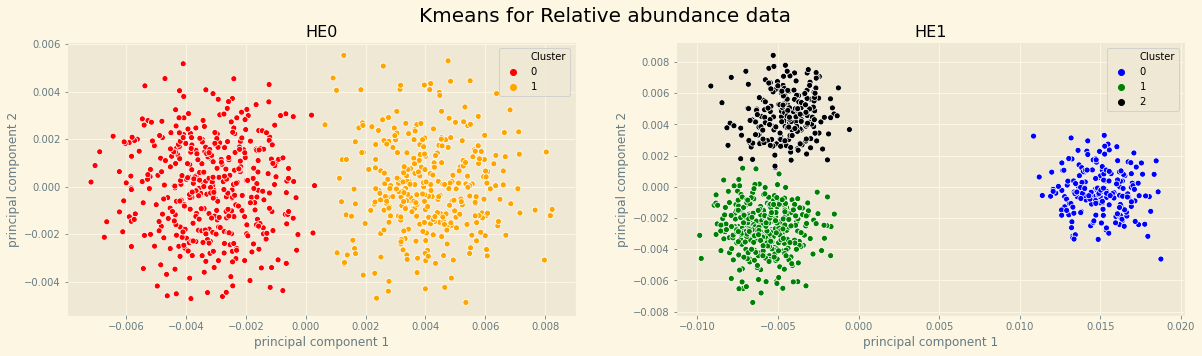

In [0]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.scatterplot("principal component 1","principal component 2",hue='Cluster',palette=['red','orange'],data=prin_comp_00_kmeans,ax=axes[0])
axes[0].set_title("HE0")
sns.scatterplot("principal component 1","principal component 2",hue='Cluster',palette=['blue','green','black'],data=prin_comp_11_kmeans,ax=axes[1])
axes[1].set_title("HE1")
fig.suptitle('Kmeans for Relative abundance data ',fontsize=20)

b)

Text(0.5, 1.0, 'BIC Scores')

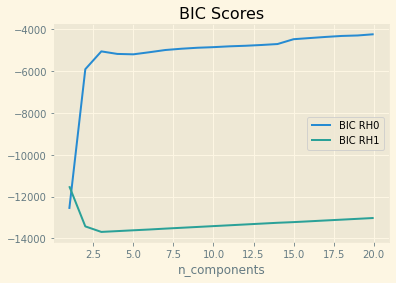

In [0]:

from sklearn.mixture import GaussianMixture 
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(prin_comp_1) for n in n_components]
plt.plot(n_components, [m.bic(prin_comp_0) for m in models], label='BIC RH0')
plt.plot(n_components, [m.bic(prin_comp_1) for m in models], label='BIC RH1')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.title('BIC Scores')

The lesser the BIC score, the better is the model and we choose the optimal number of clusters to be 2 since it has the least BIC score after 1. Similarly in RH1, number of clusters comes out to be 3 (that has the least BIC score)

In [0]:
from sklearn.mixture import GaussianMixture 

#For RH0
gmm = GaussianMixture(n_components=2)
pred_y=gmm.fit_predict(prin_comp_0)
pred_y=pd.DataFrame(pred_y,columns=['Cluster'])
prin_comp_00_GMM = pd.concat([df_HE0_0_transpose.reset_index()['index'],prin_comp_0.reset_index(drop=True), pred_y], axis=1)

##The means and covariance of the model after it has converged
print(gmm.means_)
print(gmm.covariances_)

[[ 4.06409914e-03  1.62020147e-05]
 [-3.17359787e-03 -1.26519254e-05]]
[[[ 3.24933919e-06 -3.81607604e-08]
  [-3.81607604e-08  4.67979641e-06]]

 [[ 3.26061682e-06 -6.17716016e-08]
  [-6.17716016e-08  4.91653040e-06]]]


In [0]:
#For RH1
gmm = GaussianMixture(n_components=3)
pred_y=gmm.fit_predict(prin_comp_1)
pred_y=pd.DataFrame(pred_y,columns=['Cluster'])
prin_comp_11_GMM = pd.concat([df_HE1_1_transpose.reset_index()['index'],prin_comp_1.reset_index(drop=True), pred_y], axis=1)

print(gmm.means_)
print(gmm.covariances_)

[[-0.00450022  0.00460042]
 [ 0.01494917 -0.00030316]
 [-0.00579397 -0.00265724]]
[[[ 3.24979161e-06  2.25056313e-07]
  [ 2.25056313e-07  3.31374395e-06]]

 [[ 3.48928796e-06 -1.83963552e-07]
  [-1.83963552e-07  3.15944891e-06]]

 [[ 3.33818022e-06 -9.34338204e-08]
  [-9.34338204e-08  3.43769203e-06]]]


Text(0.5, 0.98, 'GMM for Relative abundance data ')

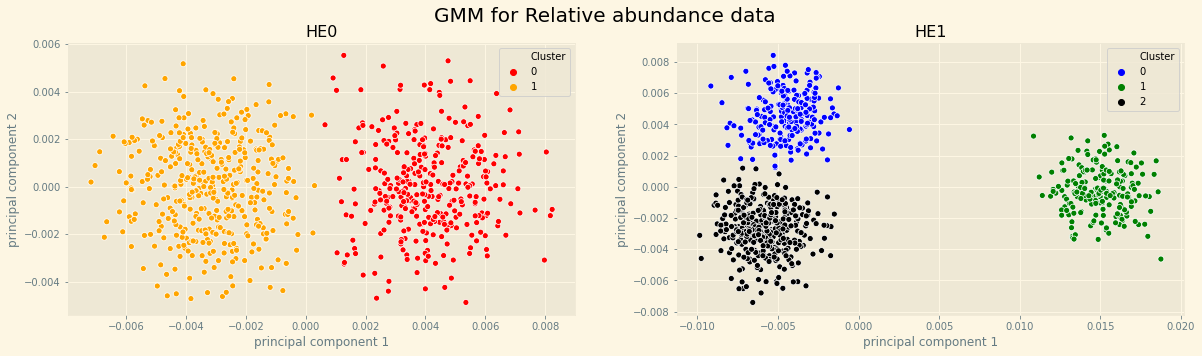

In [0]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.scatterplot("principal component 1","principal component 2",hue='Cluster',palette=['red','orange'],data=prin_comp_00_GMM,ax=axes[0])
axes[0].set_title("HE0")
sns.scatterplot("principal component 1","principal component 2",hue='Cluster',palette=['blue','green','black'],data=prin_comp_11_GMM,ax=axes[1])
axes[1].set_title("HE1")
fig.suptitle('GMM for Relative abundance data ',fontsize=20)

In [0]:
from sklearn.cluster import AgglomerativeClustering
#For Relative Abundance 0
Agg=AgglomerativeClustering(n_clusters=2,linkage="complete")
pred_y1=Agg.fit_predict(prin_comp_0)
pred_y1=pd.DataFrame(pred_y1,columns=['Cluster'])
prin_comp_00_complete = pd.concat([df_HE0_0_transpose.reset_index()['index'],prin_comp_0.reset_index(drop=True), pred_y1], axis=1)


Agg=AgglomerativeClustering(n_clusters=2,linkage="single")
pred_y2=Agg.fit_predict(prin_comp_0)
pred_y2=pd.DataFrame(pred_y2,columns=['Cluster'])
prin_comp_00_single = pd.concat([df_HE0_0_transpose.reset_index()['index'],prin_comp_0.reset_index(drop=True), pred_y2], axis=1)

Text(0.5, 1.0, 'Single link HE0')

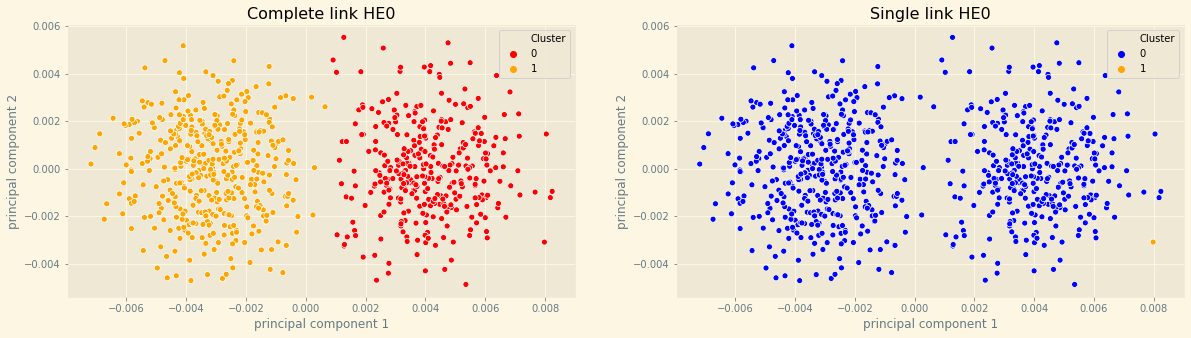

In [0]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.scatterplot("principal component 1","principal component 2",hue='Cluster',palette=['red','orange'],data=prin_comp_00_complete,ax=axes[0])
axes[0].set_title("Complete link HE0")
sns.scatterplot("principal component 1","principal component 2",hue='Cluster',palette=['blue','orange'],data=prin_comp_00_single,ax=axes[1])
axes[1].set_title("Single link HE0")


In [0]:
from sklearn.cluster import AgglomerativeClustering
#For Relative Abundance 1
Agg=AgglomerativeClustering(n_clusters=3,linkage="complete")
pred_y1=Agg.fit_predict(prin_comp_1)
pred_y1=pd.DataFrame(pred_y1,columns=['Cluster'])
prin_comp_11_complete = pd.concat([df_HE1_1_transpose.reset_index()['index'],prin_comp_1.reset_index(drop=True), pred_y1], axis=1)


Agg=AgglomerativeClustering(n_clusters=3,linkage="single")
pred_y2=Agg.fit_predict(prin_comp_1)
pred_y2=pd.DataFrame(pred_y2,columns=['Cluster'])
prin_comp_11_single = pd.concat([df_HE1_1_transpose.reset_index()['index'],prin_comp_1.reset_index(drop=True), pred_y2], axis=1)

Text(0.5, 1.0, 'Single link HE1')

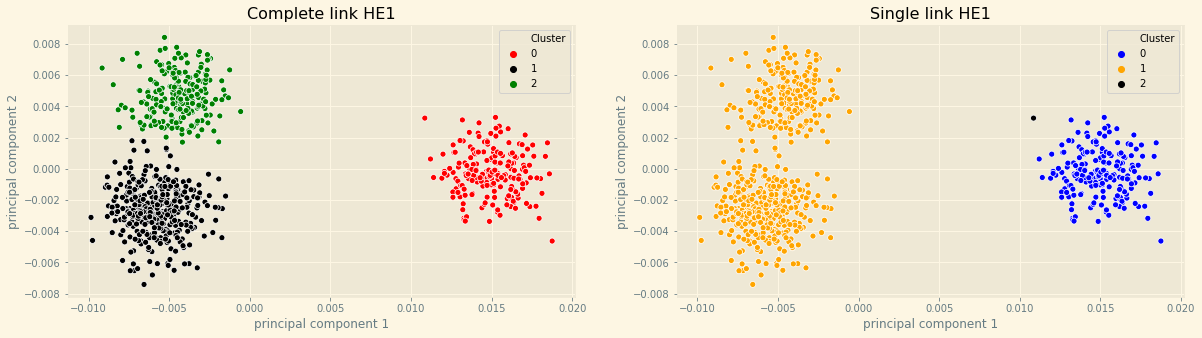

In [0]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.scatterplot("principal component 1","principal component 2",hue='Cluster',palette=['red','black','green'],data=prin_comp_11_complete,ax=axes[0])
axes[0].set_title("Complete link HE1")
sns.scatterplot("principal component 1","principal component 2",hue='Cluster',palette=['blue','orange','black'],data=prin_comp_11_single,ax=axes[1])
axes[1].set_title("Single link HE1")


<b>d) Single link uses the minimum of the distances between all observations of the two sets and
Complete link uses the maximum distances between all observations of the two sets.<br>

Yes. We could see a difference in the clusters being formed in single and complete linkage clustering. There is one single data point which is located little further away from the clusters (Right side in the last 2 picture)
in single linking which is forming its own cluster

</b>

e) The clusters obtained through Kmeans, GMM and hierarchical clustering are very similar to each other. This is due to the inherent boundary of a group of datapoints which are far away from another set (as can be seen in their principal compoenents)

f) The clusters found through different algorithm represent the subpopulation of samples which shows certain attribute as compared to another subpopulation. For example, the first cluster might have higher relative abundandance of certain specific type microbes as compared to the other clusters.


The factors that could account for these type of clustering pattern would be the difference in the relative abundance of different microbes in different samples

g) We look at the plot and are able to see the distinction between the different groups of point visually here.<br>
Some of the factors that might result in the decision being inaccurate are:<br>
1) No clear decision boundary of Principal components to distinguish the clusters<br>
2) When there are more variables which explain variance in the data, the plot becomes high dimensional, its not easy to identify them<br>

# <b>Task 4 : <b>
(Considering Kmeans)<b>

Decision process – Approach:

There are different cluster data at a sample level for all the 149 columns.
We take the average relative abundance of microbes in each of these clusters.

Then we compare cluster 0,1 of HE0 with cluster 0,1,2 of HE1 by taking the % difference of average relative abundance of each microbes between clusters. 
There exist 6 pairwise comparisons in thus scenario

Further, we extract the descriptive statistics of  % difference of microbe for different pairwise cluster comparison.

Based on the mean % difference of different cluster comparison, we select a suitable threshold to label the clusters as similar or different.

(Update post completion of analysis)
Based on our mean % difference of different cluster comparison, we could see that it the %age ranges from 1% - 9% (table in the next slide). Hence we take the % cutoff allowed to be 5%. 
If the total #microbes having more 5% change in relative abundance change consitutes 30% of the total, then we say that the subpopulations are different


<b>a) and b)<b>

In [0]:
Index0=df_HE0_0.T.reset_index().rename(columns={'index':'Sample'})
Index1=df_HE1_1.T.reset_index().rename(columns={'index':'Sample'})

kmeans_HE0=pd.concat([Index0,prin_comp_00_kmeans['Cluster'].reset_index(drop=True)],axis=1,ignore_index=False)
kmeans_HE1=pd.concat([Index1,prin_comp_11_kmeans['Cluster'].reset_index(drop=True)],axis=1,ignore_index=False)

####Clusters
kmeans_HE0_0=kmeans_HE0[kmeans_HE0['Cluster']==0]
kmeans_HE0_1=kmeans_HE0[kmeans_HE0['Cluster']==1]
kmeans_HE1_0=kmeans_HE1[kmeans_HE1['Cluster']==0]
kmeans_HE1_1=kmeans_HE1[kmeans_HE1['Cluster']==1]
kmeans_HE1_2=kmeans_HE1[kmeans_HE1['Cluster']==2]

Calculating the average relative abundance of microbes in both the datasets

In [0]:


HE0_df=pd.DataFrame()
#df1,kmeans_HE0_1.mean(axis=0),kmeans_HE1_0.mean(axis=00),kmeans_HE1_1.mean(axis=0),kmeans_HE1_2.mean(axis=0))
x=kmeans_HE0_0.mean(axis=0)
y=kmeans_HE0_1.mean(axis=0)
for i in [kmeans_HE0_0,kmeans_HE0_1]:
  #HE0_df=pd.concat([pd.DataFrame(i.mean(axis=0))], axis=1)
  x=i.mean(axis=0)
  HE0_df=pd.concat([HE0_df,pd.DataFrame(x)],axis=1)

HE0_df.columns=['kmeans_HE0_0','kmeans_HE0_1']

HE1_df=pd.DataFrame()
#df1,kmeans_HE0_1.mean(axis=0),kmeans_HE1_0.mean(axis=00),kmeans_HE1_1.mean(axis=0),kmeans_HE1_2.mean(axis=0))
x=kmeans_HE0_0.mean(axis=0)
y=kmeans_HE0_1.mean(axis=0)
for i in [kmeans_HE1_0,kmeans_HE1_1,kmeans_HE1_2]:
  #HE0_df=pd.concat([pd.DataFrame(i.mean(axis=0))], axis=1)
  x=i.mean(axis=0)
  HE1_df=pd.concat([HE1_df,pd.DataFrame(x)],axis=1)
HE1_df.columns=['kmeans_HE1_0','kmeans_HE1_1','kmeans_HE1_2']


HE0_df.reset_index(inplace=True)
HE1_df.reset_index(inplace=True)
HE0_df=HE0_df[HE0_df['index']!='Cluster']
HE1_df=HE1_df[HE1_df['index']!='Cluster']

In [0]:
x=pd.DataFrame(HE0_df['index'])
for i in HE0_df.drop(columns='index').columns:
  y=0
  for j in HE1_df.drop(columns='index').columns:
    x[i+j+'column']=abs((HE1_df[j]-HE0_df[i])/(HE0_df[i]))

In [0]:
x.head()

,index,kmeans_HE0_0kmeans_HE1_0column,kmeans_HE0_0kmeans_HE1_1column,kmeans_HE0_0kmeans_HE1_2column,kmeans_HE0_1kmeans_HE1_0column,kmeans_HE0_1kmeans_HE1_1column,kmeans_HE0_1kmeans_HE1_2column
0,Acidobacteria_Acidobacteria_Gp1_Telmatobacter_...,0.007246,0.021475,0.043105,0.056218,0.069745,0.008350
1,Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.170962,0.007488,0.142998,0.034906,0.155397,0.002353
2,Actinobacteria_Actinobacteria_Acidimicrobiales...,0.011241,0.003575,0.017397,0.059298,0.052004,0.032051
3,Actinobacteria_Actinobacteria_Actinomycetales_...,0.005538,0.018682,0.077060,0.054103,0.041739,0.013177
4,Actinobacteria_Actinobacteria_Actinomycetales_...,0.013384,0.002998,0.076190,0.047940,0.063330,0.011066


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'T-SNe plots for Relative abundance data ')

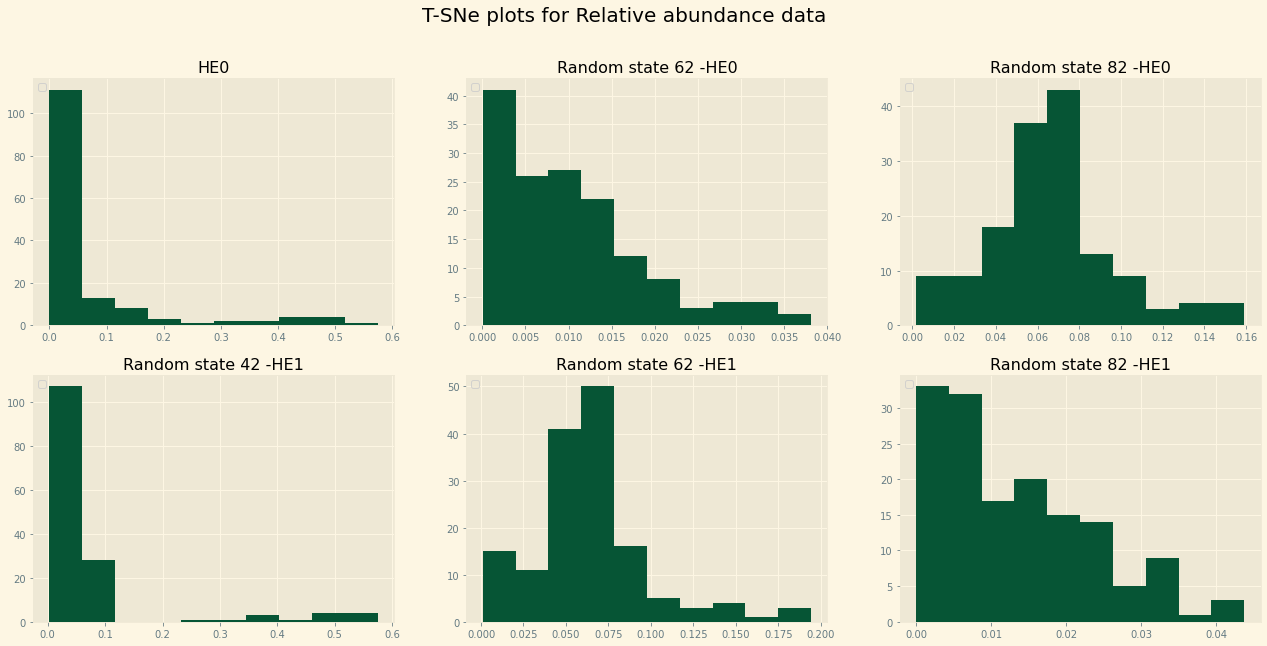

In [0]:
fig, ax = plt.subplots(2, 3, figsize=(22,10))

ax[0][0].hist(x['kmeans_HE0_0kmeans_HE1_0column'],color='#065535')
ax[0][0].legend(loc='upper left')
ax[0][0].set_title('HE0')

ax[0][1].hist(x['kmeans_HE0_0kmeans_HE1_1column'],color='#065535')
ax[0][1].legend(loc='upper left')
ax[0][1].set_title('Random state 62 -HE0')

ax[0][2].hist(x['kmeans_HE0_0kmeans_HE1_2column'],color='#065535')
ax[0][2].legend(loc='upper left')
ax[0][2].set_title('Random state 82 -HE0')


ax[1][0].hist(x['kmeans_HE0_1kmeans_HE1_0column'],color='#065535')
ax[1][0].legend(loc='upper left')
ax[1][0].set_title('Random state 42 -HE1')

ax[1][1].hist(x['kmeans_HE0_1kmeans_HE1_1column'],color='#065535')
ax[1][1].legend(loc='upper left')
ax[1][1].set_title('Random state 62 -HE1')

ax[1][2].hist(x['kmeans_HE0_1kmeans_HE1_2column'],color='#065535')
ax[1][2].legend(loc='upper left')
ax[1][2].set_title('Random state 82 -HE1')

fig.suptitle('T-SNe plots for Relative abundance data ',fontsize=20)

In [0]:
for i in x.drop(columns='index').columns:
  if len(x[x[i]>0.05])/len(x)>0.3:
    print("The % of observation for {} is {} and they are different".format(i,len(x[x[i]>0.05])/len(x)))
  else:
    print("The % of observation for {} is {} and they are same".format(i,len(x[x[i]>0.05])/len(x)))

The % of observation for kmeans_HE0_0kmeans_HE1_0column is 0.2953020134228188 and they are same
The % of observation for kmeans_HE0_0kmeans_HE1_1column is 0.0 and they are same
The % of observation for kmeans_HE0_0kmeans_HE1_2column is 0.7516778523489933 and they are different
The % of observation for kmeans_HE0_1kmeans_HE1_0column is 0.5100671140939598 and they are different
The % of observation for kmeans_HE0_1kmeans_HE1_1column is 0.697986577181208 and they are different
The % of observation for kmeans_HE0_1kmeans_HE1_2column is 0.0 and they are same


For the 3 subpopulations of HE1,<br>
 1) kmeans_HE1_2 is statistically different from kmeans_HE0_0<br>
 2) kmeans_HE1_0 is statistically different from kmeans_HE0_1<br>
 3) kmeans_HE1_1 is statistically different from kmeans_HE0_1<br>

 

In [0]:
x.describe()

,kmeans_HE0_0kmeans_HE1_0column,kmeans_HE0_0kmeans_HE1_1column,kmeans_HE0_0kmeans_HE1_2column,kmeans_HE0_1kmeans_HE1_0column,kmeans_HE0_1kmeans_HE1_1column,kmeans_HE0_1kmeans_HE1_2column
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.074309,0.010289,0.066409,0.084639,0.063900,0.013363
std,0.122092,0.008441,0.030614,0.123575,0.033887,0.010242
min,0.000070,0.000044,0.001737,0.003137,0.001025,0.000017
25%,0.011868,0.003575,0.050265,0.036233,0.047661,0.005361
50%,0.025462,0.008802,0.065777,0.050878,0.060624,0.011624
75%,0.061101,0.014718,0.078219,0.061181,0.075004,0.020943
max,0.574647,0.038112,0.159064,0.574869,0.194180,0.043698


# b.
For the different HE1 subpopulation,the similar ones are <br>
kmeans_HE0_0kmeans_HE1_0 (Cluster 0)<br>
kmeans_HE0_0kmeans_HE1_1 (Cluster 1)<br>
kmeans_HE0_1kmeans_HE1_2 (Cluster 2)



## <b>c)  Identifying microbes<b>

In [0]:
def func(x,y):
  ks_test_values={}
  for num in range(1,len(x.columns)-1):
    ks_test_values[num]=stats.ks_2samp(x.iloc[1:,num],y.iloc[1:,num])

  l1=list(x.columns)
  Microbes={}
  a=0
  while a<=len(l1):
    for i,j in ks_test_values.items():
      if j[1]>0.0000025:
        Microbes[l1[i]]=[]
        Microbes[l1[i]].append(' Microbe’s abundance is not altered')
        Microbes[l1[i]].append(j[1])
        ' Microbe’s abundance is altered'
      elif j[1]<0.0000025:
        Microbes[l1[i]]=[]
        Microbes[l1[i]].append('Microbe’s abundance is altered')
        Microbes[l1[i]].append(j[1])
      a+=1
  Microbes_difference=pd.DataFrame.from_dict(Microbes, orient='index')
  Microbes_difference.rename(columns={0:'Microbes abundance',1:'p-value'},inplace=True)
  return (Microbes_difference[Microbes_difference['Microbes abundance']=='Microbe’s abundance is altered']['Microbes abundance'])

In [0]:
Microbes_1=func(kmeans_HE0_0,kmeans_HE1_0)
Microbes_2=Microbes_1.append(func(kmeans_HE0_0,kmeans_HE1_1))
Microbes_3=Microbes_2.append(func(kmeans_HE0_0,kmeans_HE1_1))
Microbes_name=Microbes_3.reset_index()['index']
Microbes_name=list(Microbes_name)
print("The total #microbes which has altered abundance is {}".format(len(Microbes_name)))

The total #microbes which has altered abundance is 36


In [0]:
x1=pd.DataFrame(HE0_df['index'])
for i in HE0_df.drop(columns='index').columns:
  y=0
  for j in HE1_df.drop(columns='index').columns:
    x1[i+j+'column']=(HE1_df[j]-HE0_df[i])/(HE0_df[i])

In [0]:
#x2.to_csv("final.csv")

In [0]:
x2=x1[x1['index'].isin(Microbes_name)]

x2[x2['kmeans_HE0_0kmeans_HE1_0column']>0]['index'] ##List of all microbes with an increase in relative abundance

11     Actinobacteria_Actinobacteria_Actinomycetales_...
13     Actinobacteria_Actinobacteria_Actinomycetales_...
33     Bacteroidetes_Sphingobacteriia_Sphingobacteria...
38     Chrysiogenetes_Chrysiogenetes_Chrysiogenales_C...
44     Firmicutes_Bacilli_Bacillales_Bacillales_Incer...
78     Firmicutes_Clostridia_Halanaerobiales_Halanaer...
87     Parvarchaeota_Candidatus Parvarchaeum_Candidat...
95     Proteobacteria_Alphaproteobacteria_Rhizobiales...
96     Proteobacteria_Alphaproteobacteria_Rhizobiales...
104       Proteobacteria_Alphaproteobacteria_SAR11_SAR11
Name: index, dtype: object

In [0]:
x2[x2['kmeans_HE0_0kmeans_HE1_0column']<0]['index'] ##List of all microbes with a decrease in relative abundance

1                Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3
5      Actinobacteria_Actinobacteria_Actinomycetales_...
14     Actinobacteria_Actinobacteria_Actinomycetales_...
20     Bacteroidetes_Bacteroidia_Bacteroidales_Bacter...
22     Bacteroidetes_Bacteroidia_Bacteroidales_Marini...
34     Candidatus Saccharibacteria_Saccharibacteria_g...
37     Chloroflexi_Ktedonobacteria_Ktedonobacterales_...
43           Firmicutes_Bacilli_Bacillales_Bacillaceae 2
53     Firmicutes_Bacilli_Lactobacillales_Lactobacill...
57     Firmicutes_Clostridia_Clostridiales_Clostridia...
58     Firmicutes_Clostridia_Clostridiales_Clostridia...
62     Firmicutes_Clostridia_Clostridiales_Clostridia...
63     Firmicutes_Clostridia_Clostridiales_Clostridia...
71     Firmicutes_Clostridia_Clostridiales_Lachnospir...
82     Firmicutes_Negativicutes_Selenomonadales_Veill...
85     Lentisphaerae_Lentisphaeria_Victivallales_Vict...
88     Proteobacteria_Alphaproteobacteria_Caulobacter...
99     Proteobacteria_Alphaprot